In [110]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
url = 'https://raw.githubusercontent.com/santosh-cr7/House-Price-Prediction/main/data.csv'

In [112]:
dataset=pd.read_csv(url)

In [81]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [113]:
# convert the date column into a datetime object
import datetime as dt
dataset['date'] = pd.to_datetime(dataset['date'])

# extract the day, month, and year components
dataset['day'] = dataset['date'].dt.day
dataset['month'] =dataset['date'].dt.month
dataset['year'] = dataset['date'].dt.year


In [114]:

dataset['year'].unique()

array([2014])

In [115]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'day', 'month', 'year'],
      dtype='object')

In [85]:
dataset.street.unique()


array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [86]:
dataset.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [87]:
dataset.statezip.unique()

array(['WA 98133', 'WA 98119', 'WA 98042', 'WA 98008', 'WA 98052',
       'WA 98115', 'WA 98038', 'WA 98045', 'WA 98155', 'WA 98105',
       'WA 98074', 'WA 98106', 'WA 98007', 'WA 98092', 'WA 98198',
       'WA 98006', 'WA 98102', 'WA 98011', 'WA 98125', 'WA 98003',
       'WA 98136', 'WA 98033', 'WA 98029', 'WA 98117', 'WA 98034',
       'WA 98072', 'WA 98023', 'WA 98107', 'WA 98166', 'WA 98116',
       'WA 98024', 'WA 98055', 'WA 98077', 'WA 98027', 'WA 98059',
       'WA 98075', 'WA 98014', 'WA 98065', 'WA 98199', 'WA 98053',
       'WA 98058', 'WA 98122', 'WA 98103', 'WA 98112', 'WA 98005',
       'WA 98118', 'WA 98177', 'WA 98004', 'WA 98019', 'WA 98144',
       'WA 98168', 'WA 98001', 'WA 98056', 'WA 98146', 'WA 98028',
       'WA 98148', 'WA 98057', 'WA 98040', 'WA 98010', 'WA 98051',
       'WA 98031', 'WA 98109', 'WA 98030', 'WA 98126', 'WA 98032',
       'WA 98178', 'WA 98288', 'WA 98108', 'WA 98070', 'WA 98188',
       'WA 98002', 'WA 98039', 'WA 98022', 'WA 98068', 'WA 980

In [88]:
dataset.country.unique()

array(['USA'], dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['statezip']=lb.fit_transform(dataset['statezip'])
dataset['statezip']=lb.fit_transform(dataset['statezip'])

In [90]:
dataset.street.dtypes

dtype('O')

In [91]:
dataset.date.unique()

array(['2014-05-02T00:00:00.000000000', '2014-05-03T00:00:00.000000000',
       '2014-05-04T00:00:00.000000000', '2014-05-05T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', '2014-05-07T00:00:00.000000000',
       '2014-05-08T00:00:00.000000000', '2014-05-09T00:00:00.000000000',
       '2014-05-10T00:00:00.000000000', '2014-05-11T00:00:00.000000000',
       '2014-05-12T00:00:00.000000000', '2014-05-13T00:00:00.000000000',
       '2014-05-14T00:00:00.000000000', '2014-05-15T00:00:00.000000000',
       '2014-05-16T00:00:00.000000000', '2014-05-17T00:00:00.000000000',
       '2014-05-18T00:00:00.000000000', '2014-05-19T00:00:00.000000000',
       '2014-05-20T00:00:00.000000000', '2014-05-21T00:00:00.000000000',
       '2014-05-22T00:00:00.000000000', '2014-05-23T00:00:00.000000000',
       '2014-05-24T00:00:00.000000000', '2014-05-25T00:00:00.000000000',
       '2014-05-26T00:00:00.000000000', '2014-05-27T00:00:00.000000000',
       '2014-05-28T00:00:00.000000000', '2014-05-29

In [92]:
dataset=dataset.drop(['date','year'],axis=1)

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   int64  
 16  country        4600 non-null   object 
 17  day            4600 non-null   int64  
 18  month   

In [95]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
day              0
month            0
dtype: int64

In [96]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,62,USA,2,5
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,58,USA,2,5
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,26,USA,2,5
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,7,USA,2,5
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,31,USA,2,5


In [97]:
dataset['date'] = dataset.bedrooms

In [98]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'day', 'month', 'date'],
      dtype='object')

In [99]:
dataset.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip           int64
country           object
day                int64
month              int64
date             float64
dtype: object

In [100]:
dataset.nunique()

price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
day                31
month               3
date               10
dtype: int64

In [101]:
dataset[dataset.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,date


In [102]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,day,month,date
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,38.743696,14.791304,5.757609,3.400870
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,20.919517,8.677569,0.683851,0.908848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,21.000000,7.000000,5.000000,3.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,41.000000,14.000000,6.000000,3.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,56.000000,23.000000,6.000000,4.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,76.000000,31.000000,7.000000,9.000000


In [103]:
corr = dataset.corr()
corr.shape

<ipython-input-103-c8c006ac2702>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


(17, 17)

<Axes: >

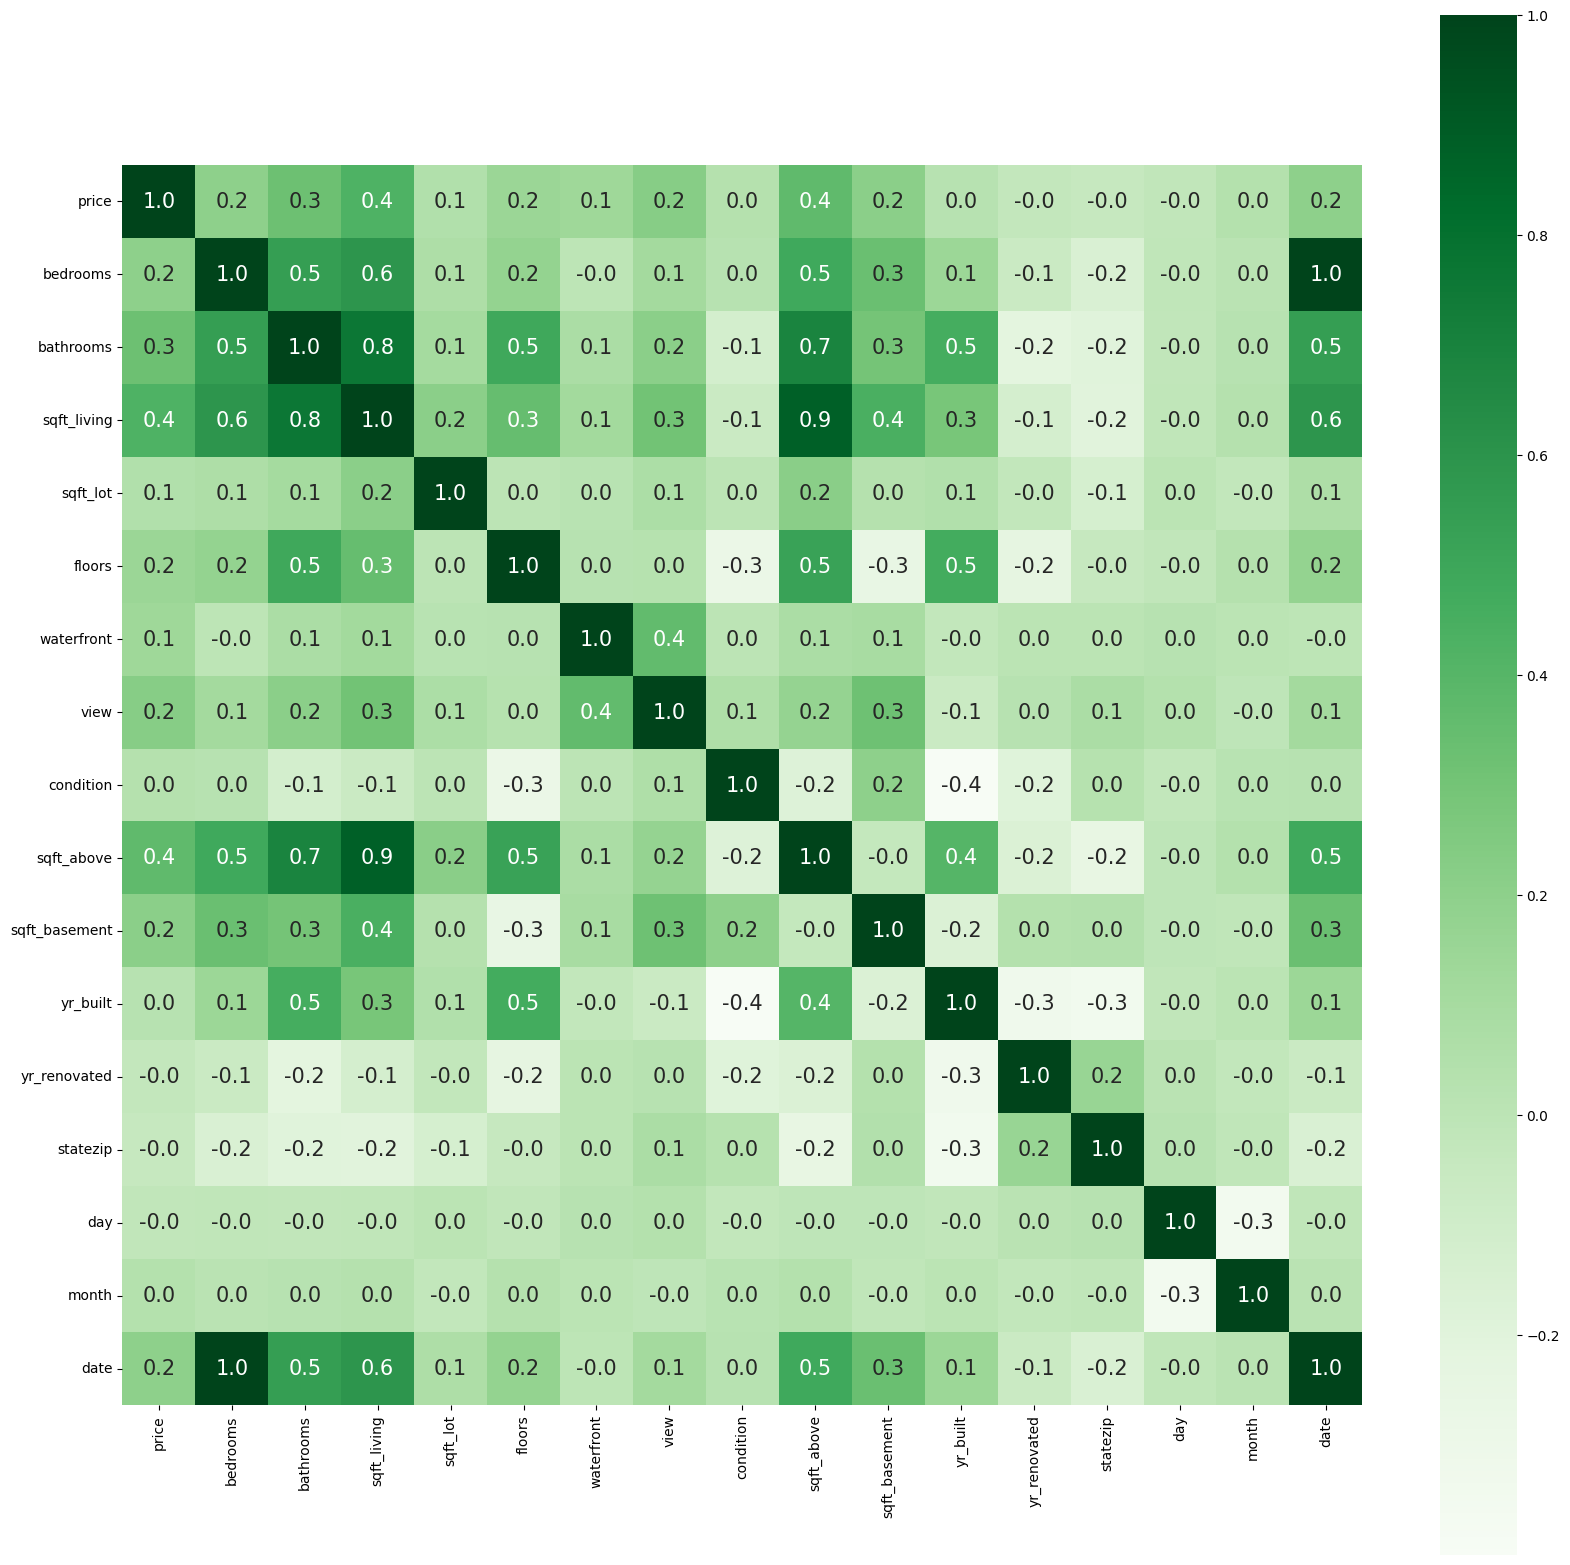

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [105]:
#delete the columns with help of the pandas drop
dataset=dataset.drop(['view'],axis=1)
X=dataset.drop(columns='price',axis=1)
y=dataset.price

In [118]:
le=LabelEncoder()
for i in dataset.columns:
  if(dataset[i].dtypes=='O'):
    dataset[i]=le.fit_transform(dataset[i])

In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   int64         
 15  city           4600 n

In [124]:
X=dataset.drop('price',axis=1)
y=dataset.price

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

#Train Model

In [108]:
print(" new shape of datasets",dataset.shape)
dataset.head()

b=(dataset.columns)

 new shape of datasets (4600, 19)


### Linear Regression



Training the model

In [126]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,y_train)
y_pred= slr.predict(X_test)

y_pred.shape
y_test.shape


(1380,)

In [128]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)





Intercept:  4047676.851241614
Coefficient:  [-6.11673405e+04  5.83500063e+04  1.61835236e+02 -6.46745630e-01
  1.59906672e+04  4.36877433e+05  3.45899329e+04  3.80370167e+04
  9.86938762e+01  6.31413598e+01 -2.18180585e+03  1.00878059e+01
 -2.35419102e+00  3.12573863e+03 -1.35284659e+03  1.09139364e-11
 -7.73240028e+02  2.91555345e+04  0.00000000e+00]


In [129]:
slr.score(X_test,y_test)

0.5418966831100164

#Polynomial Regression

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
#train  data according to the  polynimial feature
poly_reg.fit(X_train)
#transform the data
train_poly=poly_reg.transform(X_train)
test_poly=poly_reg.transform(X_test)

In [130]:
slr.fit(train_poly,y_train)
slr.score(test_poly,y_test)

0.4059384537473977

#Suppor Vector Machine

In [131]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y_train)


yt1 = lab.fit_transform(y_test)
#view transformed values
#print(y_transformed)

print(yt.shape)
print(X_train.shape)


from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(X_train,y_train)
print(svr_rbf.score(X_test,y_test))

(3220,)
(3220, 19)
-0.05159100361630209


#Decision Tree

In [132]:
# import the regressor

from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)


regressor.score(X_test, y_test)

0.4063158249788399

#Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)



regr.score(X_test, y_test)

0.4408668927095114

In [134]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
   # print('RMSE value for k= ' , K , 'is:', error)

<Axes: >

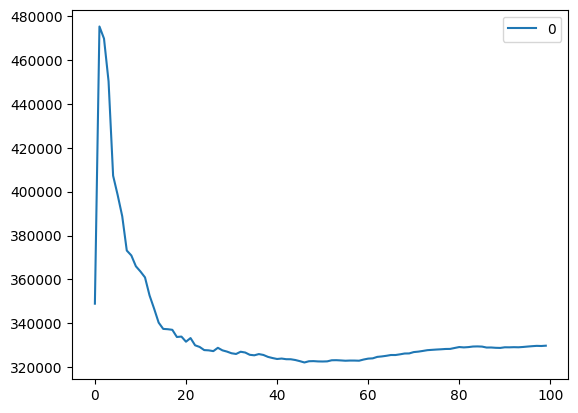

In [135]:
curve = pd.DataFrame(rmse_val)
 #elbow curve
curve.plot()

In [136]:
model.score(X_test,y_test)

0.2491076193811007

In [137]:
model = neighbors.KNeighborsRegressor(n_neighbors = 65)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.2699377992132823

#Deep Learning

In [138]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1729 (6.75 KB)
Trainable params: 1729 (6.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
model.fit(X_train, y_train, epochs = 20, batch_size = 16, validation_data = (X_test, y_test))

Epoch 1/20
202/202 [==============================] - 3s 7ms/step - loss: -36272517120.0000 - accuracy: 0.0000e+00 - val_loss: -130479120384.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
202/202 [==============================] - 1s 4ms/step - loss: -605640196096.0000 - accuracy: 0.0000e+00 - val_loss: -1290597957632.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
202/202 [==============================] - 1s 3ms/step - loss: -3150316044288.0000 - accuracy: 0.0000e+00 - val_loss: -4914939428864.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
202/202 [==============================] - 1s 3ms/step - loss: -8470035169280.0000 - accuracy: 0.0000e+00 - val_loss: -11517214851072.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
202/202 [==============================] - 1s 3ms/step - loss: -17327892463616.0000 - accuracy: 0.0000e+00 - val_loss: -22062315864064.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
202/202 [==============================] - 1s 3ms/step - loss: -32067706421248.0000 - accuracy: 0.0000e+00 - v

In [140]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

44/44 [==============================] - 0s 2ms/step - loss: -976828437102592.0000 - accuracy: 0.0000e+00
Test loss: -976828437102592.0000
Test accuracy: 0.0000
